<a href="https://colab.research.google.com/github/Aleksandra-Shukova/OpenCV/blob/main/OpenCV_pz_1_short.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Ai learning
  - Python
    - OpenCV

practic 1

Разработать программу, которая будет выполнять следующие
действия:
- Читать видео из файла
- Распознавать позицию яркой точки
- Отображать на экране историю (траекторию движения яркой точки с начала видео)
- Финальный кадр c траекторией поместить в файл result.jpg
- Полученную картинку поместить в папку result


Результаты помеcтить в gitlab в проект
Прислать ссылку на проект
https://gitlab.mai.ru/Your_Mai_Id/dpo_ai_practic1.git

Файл видео можно скачать по ссылке:
https://drive.google.com/file/d/1JSUjrjwUTIZBEgTDhw8i6AUphxDJXZKi/view?usp=drive_link

**Full programm**

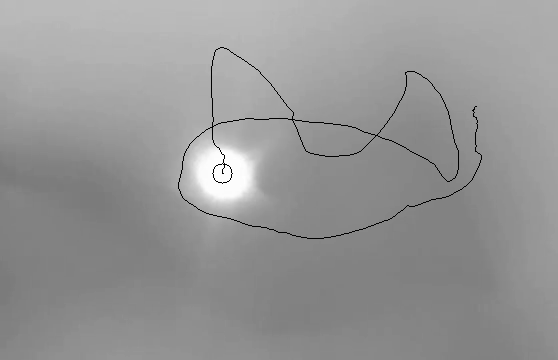

Video ended....
End of programm


In [1]:
#add google drive to colab
from google.colab import drive
drive.mount('/gdrive') #name could be anything

#set working folder
%cd /gdrive/My Drive/Colab Notebooks/Ai learning/OpenCV practice 1

import cv2 #OpenCv work with images
import numpy as np #never used here

#cv2.imshow("Frame", frame)
#disabled in google colab so we import another function:
from google.colab.patches import cv2_imshow
#cv2_imshow(frame)
#it draws one frame, just like print('text')
#to not die under ton of screenshots
from google.colab import output
#output.clear()
#will delete picture before draw a new one
#to give programm time to draw a picture
import time
#time.sleep(1) to sleep for 1 sec
#but apparently cv2 has a function
#.waitKey() that used as delay
#it is lagging more,
#so i took more casual approach time.sleep()

#for easy result showing
def myShow(xFrame):
    '''shows video frame by frame'''
    output.clear()
    cv2_imshow(xFrame)
    time.sleep(0.05)
    #cv2.waitKey(50) # 33 мс сон (~30 кадров в секунду)

myVideo = "video_output.mp4"

#trajectory of white dot
#it will be a list, but list of "tuples"
centers = []

#open video
cap = cv2.VideoCapture(myVideo)
if not cap.isOpened():
    print("Error open video!")
    exit(1)

#show the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Video ended....")
        break
    #cv2.imshow("Frame", frame) #disabled in google colab
    #myShow(frame)

    #перевод изображения в черно-белое
    grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #myShow(grey)

    #использование функции threshold
    #для определения светлого пятна
    _, threshold = cv2.threshold(grey, thresh=210, maxval=255, type=cv2.THRESH_BINARY)
    #myShow(threshold)

    #определение центра масс пятна
    #M is a dictionary for mathematic Mambo-jambo
    #it works only with threshold: black and white, not grey
    M = cv2.moments(threshold)
    # вычисляете координаты центра масс
    cX = int( M["m10"] / M["m00"] )
    cY = int( M["m01"] / M["m00"] )

    #draw circle on image,
    #in this case Grey, but it works fine with original
    cv2.circle(grey, center=( cX, cY ), radius=10, color=-1, thickness=1)
    #myShow(grey)

    #добавляете координаты центра
    #светового пятна в список
    centers.append( ( cX, cY ) )

    #для каждого кадра рисуем
    #координаты центров с помощью line
    #isnt range starts with 0?
    #for i in range(1, len(centers)): #this was a BS, you need N-1 lines to connect dots
        #cv2.line(gray, centers[i-1], centers[i], color=0, thickness=1)
    for i in range( len(centers)-1 ): #need N-1 lines to connect dots
        cv2.line(grey, centers[i], centers[i+1], color=0, thickness=1)

    myShow(grey)
    #waitKey meant to work as time.sleep
    #cv2.waitKey(33) # 33 мс сон (~30 кадров в секунду)

cv2.waitKey(0) #waiting forever,
#but unclear for what
#i bet if it isnt mentioned
#must be Any Key
#and probably cv2 starts some window
#so it would be closed, who knows
cap.release()

#save last frame to file

#./folder/filename is relative path
#create file in mentioned folder in current dirrectory
#filename will create file in current folder we set by %cd
output_img = "./result/result.png"
image = grey
cv2.imwrite(output_img, image)

print("End of programm")

**open image from google drive**

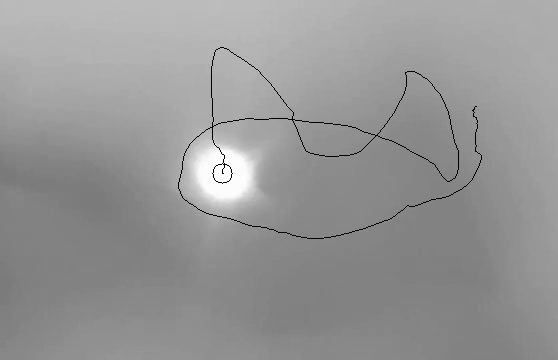

In [2]:
path_to_img = "./result/result.png"
myImg = cv2.imread( path_to_img )
myShow( myImg )